<a href="https://colab.research.google.com/github/sunnygao-ashgo/Course-Project-Summary-/blob/main/da_project_attrition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>Import data</h3>

In [ ]:
add = "/content/rawdata.csv"
import pandas as pd
from pandas import DataFrame
df = pd.read_csv(add,sep=',')
df.head()
# dependent variable: attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
# learn about the data: show no missing values
df.isna().sum()   

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
# learn about data -- data type and counts 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

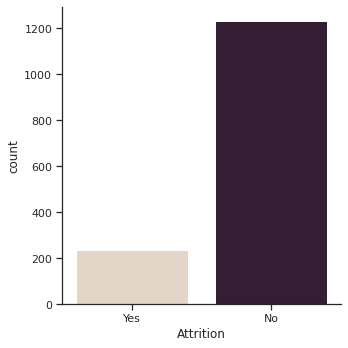

In [ ]:
# view and find imbalanced dataset where the group we are interested in contained much fewer sample sets than the other group
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

sns.catplot(x="Attrition", kind="count", palette="ch:.25", data=df)

<h3> Data Cleaning:</h3>

1. change the attrition to the first column and encode it into "1" or "0"

In [ ]:

df1 = df[ ['Attrition'] + [ col for col in df.columns if col != 'Attrition' ] ]
df1['Attrition'] = df1['Attrition'].map({'Yes':1, 'No':0})


2. delete all the columns that we do not need 

In [ ]:
df1 = df1.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis=1) # drop the columns with only one unique values
df1 = df1.drop(['DailyRate','HourlyRate','MonthlyRate'], axis=1)# high similarities
df1

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,2909,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,1,Laboratory Technician,2,Married,3468,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,36,Travel_Frequently,Research & Development,23,2,Medical,3,Male,4,2,Laboratory Technician,4,Married,2571,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,0,39,Travel_Rarely,Research & Development,6,1,Medical,4,Male,2,3,Healthcare Representative,1,Married,9991,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,0,27,Travel_Rarely,Research & Development,4,3,Life Sciences,2,Male,4,2,Manufacturing Director,2,Married,6142,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,0,49,Travel_Frequently,Sales,2,3,Medical,4,Male,2,2,Sales Executive,2,Married,5390,2,No,14,3,4,0,17,3,2,9,6,0,8


3. Store the numerical columns in a list numerical \
  Use all the numeric data for decision tree prediction 

In [ ]:

import numpy as np
df2=df1.copy()
df2['BusinessTravel']=np.select([df2['BusinessTravel']=='Non-Travel',df2['BusinessTravel']=='Travel_Frequently',df2['BusinessTravel']=='Travel_Rarely'],[0,1,2])
df2['Department']=np.select([df2['Department']=='Human Resources',df2['Department']=='Research & Development',df2['Department']=='Sales'],[0,1,2])
df2['EducationField']=np.select([df2['EducationField']=='Human Resources',df2['EducationField']=='Life Sciences',df2['EducationField']=='Marketing',df2['EducationField']=='Medical',df2['EducationField']=='Other',df2['EducationField']=='Technical Degree'],[0,1,2,3,4,5])
df2['Gender']=np.where(df2['Gender']=='Female',0,1)
df2['JobRole']=np.select([df2['JobRole']=='Healthcare Representative',df2['JobRole']=='Human Resources',df2['JobRole']=='Laboratory Technician',df2['JobRole']=='Manager',df2['JobRole']=='Manufacturing Director',df2['JobRole']=='Research Director',df2['JobRole']=='Research Scientist',df2['JobRole']=='Sales Executive',df2['JobRole']=='Sales Representative'],[0,1,2,3,4,5,6,7,8])
df2['MaritalStatus']=np.select([df2['MaritalStatus']=='Divorced',df2['MaritalStatus']=='Married',df2['MaritalStatus']=='Single'],[0,1,2])
df2['OverTime']=np.where(df2['OverTime']=='No',0,1)

df2

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,2,2,1,2,1,2,0,3,2,7,4,2,5993,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0,49,1,1,8,1,1,3,1,2,2,6,2,1,5130,1,0,23,4,4,1,10,3,3,10,7,1,7
2,1,37,2,1,2,2,4,4,1,2,1,2,3,2,2090,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0,33,1,1,3,4,1,4,0,3,1,6,3,1,2909,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0,27,2,1,2,1,3,1,1,3,1,2,2,1,3468,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,36,1,1,23,2,3,3,1,4,2,2,4,1,2571,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,0,39,2,1,6,1,3,4,1,2,3,0,1,1,9991,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,0,27,2,1,4,3,1,2,1,4,2,4,2,1,6142,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,0,49,1,2,2,3,3,4,1,2,2,7,2,1,5390,2,0,14,3,4,0,17,3,2,9,6,0,8


4. split data into train and test sets

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df2, test_size = 0.2, random_state = 1) 
# seperating data into 80% training and 20% testing sets, set seed for replication purpose

x_train = train.iloc[0:,1:] 
y_train = train[['Attrition']] 

x_test = test.iloc[0:,1:]
y_test = test[['Attrition']]



<h1> Run models -- [Iteration 1] </h1> 

<h3>1.1 Classification trees</h3>

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

model_classification = tree.DecisionTreeClassifier(max_depth = 3,criterion='entropy',random_state=1) # entropy: used for classify
model_classification.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

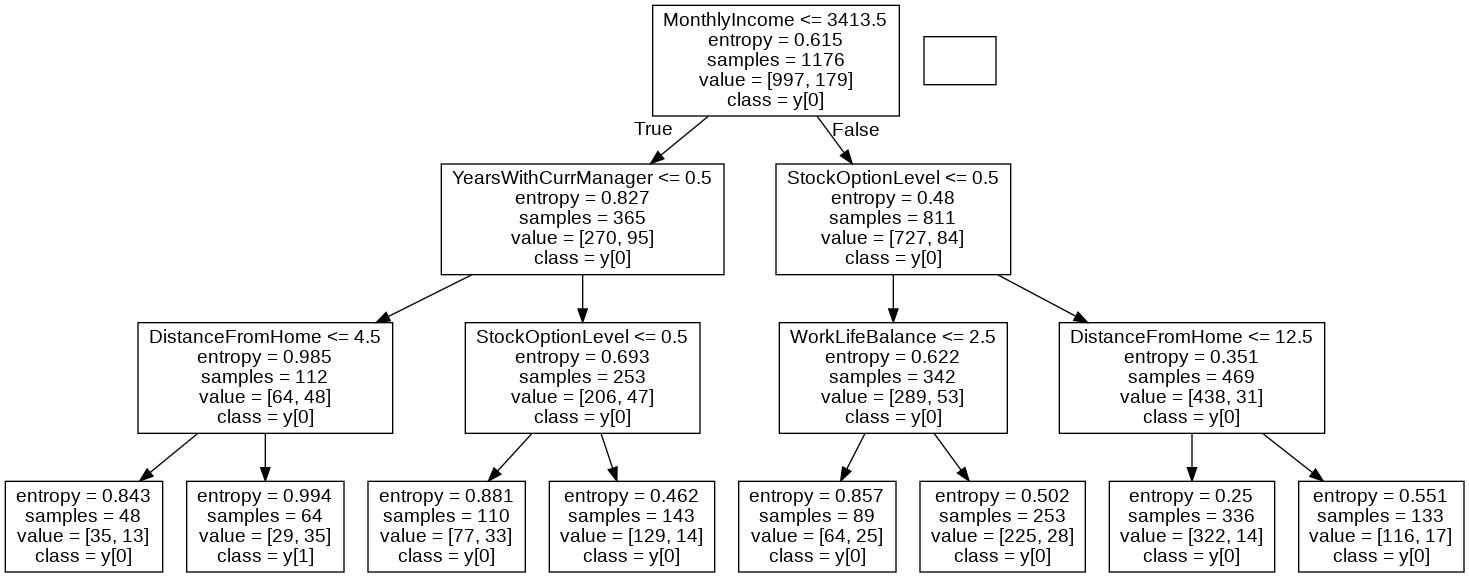

In [ ]:
import pydotplus 
from IPython.display import Image
feature_names = [key for key in df2 if not key == 'Attrition']

dot_data = tree.export_graphviz(model_classification, out_file=None,feature_names=feature_names,class_names=True) 

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
classification_train = model_classification.predict(x_train)
classification_test = model_classification.predict(x_test)

from sklearn.metrics import roc_auc_score
tp, fn, fp, tn = confusion_matrix(np.array(y_test),classification_test,labels=[1,0]).ravel()
precision = round(tp/(tp+fp),2)
tpr = round(tp/(tp+fn),2)
f_score = round(2*precision*tpr/(precision+tpr),2)
auc_score= round(roc_auc_score(y_test,classification_test),2)


print("Recall/TPR:\t\t\t%1.2f proportion of employees actually leaving the company identified"%(tpr))
print("Precision:\t\t\t%1.2f identified as attrition are leaving the company"%(precision))
print("f-score:\t\t\t%1.2f capture both precision and recall"%(f_score))
print("roc_auc_score:\t\t\t%1.2f the capability of a model in distinguishing the classes"%(auc_score))

Performance = dict()
key = ("Iteration_1_original",'tree')
Performance[key] = [tpr,precision,f_score,auc_score]

Recall/TPR:			0.16 proportion of employees actually leaving the company identified
Precision:			0.56 identified as attrition are leaving the company
f-score:			0.25 capture both precision and recall
roc_auc_score:			0.56 the capability of a model in distinguishing the classes


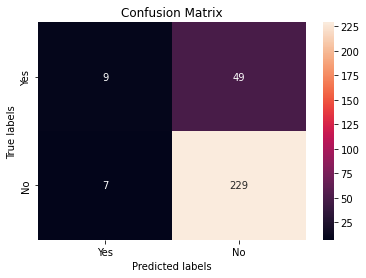

In [ ]:
cm=confusion_matrix(np.array(y_test),classification_test,labels=[1,0]).ravel()
import seaborn as sns
import matplotlib.pyplot as plt     
# fp: predict 1, fact 0 
ax= plt.subplot()
sns.heatmap(((tp,fn),(fp,tn)), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["Yes","No"]); ax.yaxis.set_ticklabels(["Yes","No"]);

<h3>1.2 Random Forest </h3>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_Random_Forests = RandomForestClassifier(max_depth=4,min_samples_leaf=4,min_samples_split=2,n_estimators=10,random_state=1)
model_Random_Forests.fit(x_train,np.ravel(y_train))

#Find the best ensemble
from sklearn.model_selection import GridSearchCV
parameters = {
     'n_estimators':(10, 30, 50),    
     'max_depth':(4,5,6,8,10,15),    
     'min_samples_split': (2, 4, 8), 
     'min_samples_leaf': (4,8,12,16) 
}

#Use the ensemble to fit the model
model_randome_best = GridSearchCV(RandomForestClassifier(),parameters,cv=3)
model_randome_best.fit(x_train, np.ravel(y_train))
model_randome_best.best_score_, model_randome_best.best_params_

depth = model_randome_best.best_params_['max_depth']
leaf = model_randome_best.best_params_['min_samples_leaf']
split = model_randome_best.best_params_['min_samples_split']
estimator = model_randome_best.best_params_['n_estimators']


model_Random_Forests = RandomForestClassifier(max_depth=depth,min_samples_leaf=leaf,min_samples_split=split,n_estimators=estimator,random_state=1)
model_Random_Forests.fit(x_train,np.ravel(y_train))

from sklearn.metrics import confusion_matrix
from sklearn import metrics


y_pred_rf = model_Random_Forests.predict(x_test)

#Calculation of confusion matrix
tp, fn, fp, tn = confusion_matrix(np.array(y_test),y_pred_rf,labels=[1,0]).ravel()
precision = round(tp/(tp+fp),2)
tpr = round(tp/(tp+fn),2)
f_score = round(2*precision*tpr/(precision+tpr),2)
auc_score= round(roc_auc_score(y_test,y_pred_rf),2)

print("Recall/TPR:\t\t\t%1.2f proportion of employees actually leaving the company identified"%(tpr))
print("Precision:\t\t\t%1.2f identified as attrition are leaving the company"%(precision))
print("f-score:\t\t\t%1.2f capture both precision and recall"%(f_score))
print("roc_auc_score:\t\t\t%1.2f the capability of a model in distinguishing the classes"%(auc_score))

key = ("Iteration_1_original",'random_forest')
Performance[key] = [tpr,precision,f_score,auc_score]


Recall/TPR:			0.12 proportion of employees actually leaving the company identified
Precision:			0.78 identified as attrition are leaving the company
f-score:			0.21 capture both precision and recall
roc_auc_score:			0.56 the capability of a model in distinguishing the classes


<h3>1.3 Bagging </h3>


In [ ]:
from sklearn.ensemble import BaggingClassifier 
model_Bagging=BaggingClassifier()
model_Bagging.fit(x_train,np.ravel(y_train))


parameters = {
     'n_estimators':(30, 50), 
     'max_samples':(30,40,50),
     'max_features':(5,10,20), 
}

model_Bagging_best = GridSearchCV(BaggingClassifier(),parameters,cv=3)
model_Bagging_best.fit(x_train, np.ravel(y_train))
model_Bagging_best.best_score_, model_Bagging_best.best_params_

feature = model_Bagging_best.best_params_['max_features']
sample = model_Bagging_best.best_params_['max_samples']
estimator = model_Bagging_best.best_params_['n_estimators']

model_Bagging=BaggingClassifier(max_features=feature,max_samples=sample,n_estimators=estimator,random_state=1)
model_Bagging.fit(x_train,np.ravel(y_train))
model_Bagging.score(x_test,y_test)

from sklearn.metrics import confusion_matrix
y_pred_bag = model_Bagging.predict(x_test)

tp, fn, fp, tn = confusion_matrix(np.array(y_test),y_pred_bag,labels=[1,0]).ravel()
precision = round(tp/(tp+fp),2)
tpr = round(tp/(tp+fn),2)
f_score = round(2*precision*tpr/(precision+tpr),2)
auc_score= round(roc_auc_score(y_test,y_pred_bag),2)

print("Recall/TPR:\t\t\t%1.2f proportion of employees actually leaving the company identified"%(tpr))
print("Precision:\t\t\t%1.2f identified as attrition are leaving the company"%(precision))
print("f-score:\t\t\t%1.2f capture both precision and recall"%(f_score))
print("roc_auc_score:\t\t\t%1.2f the capability of a model in distinguishing the classes"%(auc_score))

key = ("Iteration_1_original",'bagging')
Performance[key] = [tpr,precision,f_score,auc_score]


Recall/TPR:			0.09 proportion of employees actually leaving the company identified
Precision:			0.50 identified as attrition are leaving the company
f-score:			0.15 capture both precision and recall
roc_auc_score:			0.53 the capability of a model in distinguishing the classes


<h1>Handle unbalanced dataset:</h1>

<h2> Iteration 2- Near Miss Undersampling  </h2>

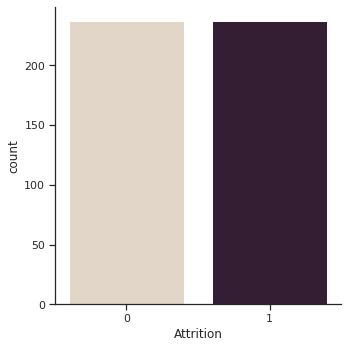

In [ ]:
# undersampling: 
import imblearn
from imblearn.under_sampling import NearMiss

undersample = NearMiss(version=1)
X, y = undersample.fit_resample(df2.iloc[0:,1:], df2[['Attrition']])
df_new=pd.concat([y,X], axis=1)

sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x="Attrition", kind="count", palette="ch:.25", data=df_new)


In [ ]:
from sklearn.model_selection import train_test_split
train_new, test_new = train_test_split(df_new, test_size = 0.2, random_state = 1) 
# seperating data into 80% training and 20% testing sets

x_train_new = train_new.iloc[0:,1:] 
y_train_new = train_new[['Attrition']] 

x_test_new = test_new.iloc[0:,1:]
y_test_new = test_new[['Attrition']]


<h3> 2.1 Classfication Tree </h3>

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

model_classification_new = tree.DecisionTreeClassifier(max_depth = 3,criterion='entropy',random_state=1) # entropy: used for classify
model_classification_new.fit(x_train_new,y_train_new)

import numpy as np
from sklearn.metrics import confusion_matrix
classification_train_new = model_classification_new.predict(x_train_new)
classification_test_new = model_classification_new.predict(x_test_new)

tp, fn, fp, tn = confusion_matrix(np.array(y_test_new),classification_test_new,labels=[1,0]).ravel()
precision = round(tp/(tp+fp),2)
tpr = round(tp/(tp+fn),2)
f_score = round(2*precision*tpr/(precision+tpr),2)
auc_score= round(roc_auc_score(y_test_new,classification_test_new),2)

print("Recall/TPR:\t\t\t%1.2f proportion of employees actually leaving the company identified"%(tpr))
print("Precision:\t\t\t%1.2f identified as attrition are leaving the company"%(precision))
print("f-score:\t\t\t%1.2f capture both precision and recall"%(f_score))
print("roc_auc_score:\t\t\t%1.2f the capability of a model in distinguishing the classes"%(auc_score))

key = ("Iteration_2_undersampling",'tree')
Performance[key] = [tpr,precision,f_score,auc_score]

#recall = predicted leave and truly leave / all people who leave 
# we want to restrict the fn(predict 0, actual 1)

Recall/TPR:			0.51 proportion of employees actually leaving the company identified
Precision:			0.89 identified as attrition are leaving the company
f-score:			0.65 capture both precision and recall
roc_auc_score:			0.72 the capability of a model in distinguishing the classes


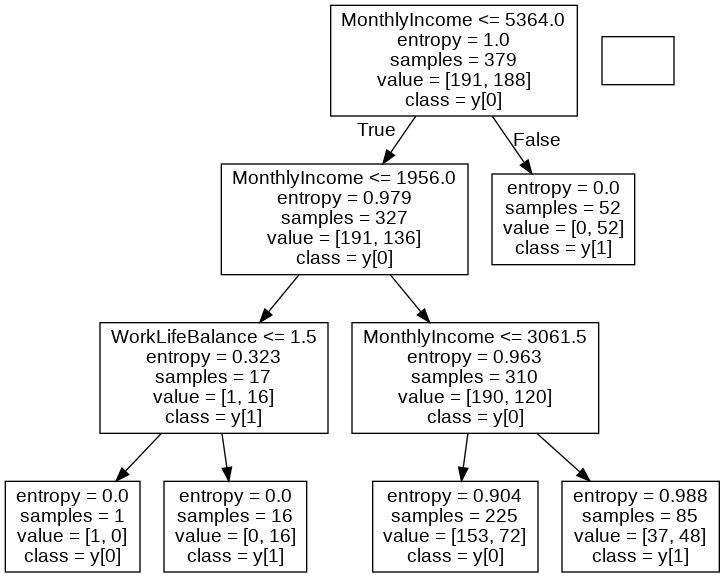

In [ ]:
import pydotplus 
from IPython.display import Image
feature_names = [key for key in df_new if not key == 'Attrition']

dot_data = tree.export_graphviz(model_classification_new, out_file=None,feature_names=feature_names,class_names=True) 

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

Image(graph.create_png())

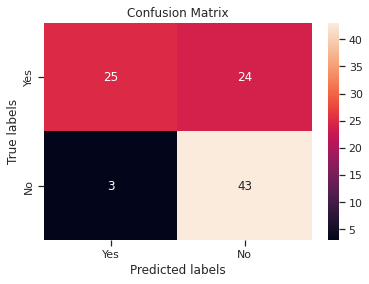

In [ ]:
cm=confusion_matrix(np.array(y_test_new),classification_test_new,labels=[1,0]).ravel()
import seaborn as sns
import matplotlib.pyplot as plt     
# fp: predict 1, fact 0 
ax= plt.subplot()
sns.heatmap(((tp,fn),(fp,tn)), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["Yes","No"]); ax.yaxis.set_ticklabels(["Yes","No"]);

<h3> 2.2 Random Forest </h3>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_Random_Forests_new = RandomForestClassifier(max_depth=4,min_samples_leaf=4,min_samples_split=2,n_estimators=10,random_state=1)
model_Random_Forests_new.fit(x_train_new,np.ravel(y_train_new))


parameters = {
     'n_estimators':(10, 30, 50),    
     'max_depth':(4,5,6,8,10,15),    
     'min_samples_split': (2, 4, 8), 
     'min_samples_leaf': (4,8,12,16) 
}
model_randome_best_new = GridSearchCV(RandomForestClassifier(),parameters,cv=3)
model_randome_best_new.fit(x_train_new, np.ravel(y_train_new))
model_randome_best_new.best_score_, model_randome_best_new.best_params_

depth = model_randome_best_new.best_params_['max_depth']
leaf = model_randome_best_new.best_params_['min_samples_leaf']
split = model_randome_best_new.best_params_['min_samples_split']
estimator = model_randome_best_new.best_params_['n_estimators']

model_Random_Forests_new = RandomForestClassifier(max_depth=depth,min_samples_leaf=leaf,min_samples_split=split,n_estimators=estimator,random_state=1)
model_Random_Forests_new.fit(x_train_new,np.ravel(y_train_new))

y_pred_rf_new = model_Random_Forests_new.predict(x_test_new)
tp, fn, fp, tn = confusion_matrix(np.array(y_test_new),y_pred_rf_new,labels=[1,0]).ravel()
precision = round(tp/(tp+fp),2)
tpr = round(tp/(tp+fn),2)
f_score = round(2*precision*tpr/(precision+tpr),2)
auc_score= round(roc_auc_score(y_test_new,y_pred_rf_new),2)

print("Recall/TPR:\t\t\t%1.2f proportion of employees actually leaving the company identified"%(tpr))
print("Precision:\t\t\t%1.2f identified as attrition are leaving the company"%(precision))
print("f-score:\t\t\t%1.2f capture both precision and recall"%(f_score))
print("roc_auc_score:\t\t\t%1.2f the capability of a model in distinguishing the classes"%(auc_score))

key = ("Iteration_2_undersampling",'random_forest')
Performance[key] = [tpr,precision,f_score,auc_score]

Recall/TPR:			0.59 proportion of employees actually leaving the company identified
Precision:			0.69 identified as attrition are leaving the company
f-score:			0.64 capture both precision and recall
roc_auc_score:			0.65 the capability of a model in distinguishing the classes


<h3> 2.3 Bagging </h3>

In [ ]:
from sklearn.ensemble import BaggingClassifier 
model_Bagging_new=BaggingClassifier()
model_Bagging_new.fit(x_train_new,np.ravel(y_train_new))

from sklearn.model_selection import GridSearchCV
parameters = {
     'n_estimators':(30, 50), 
     'max_samples':(30,40,50),
     'max_features':(5,10,20), 
}

model_Bagging_best_new = GridSearchCV(BaggingClassifier(),parameters,cv=3)
model_Bagging_best_new.fit(x_train_new, np.ravel(y_train_new))
model_Bagging_best_new.best_score_, model_Bagging_best_new.best_params_


feature = model_Bagging_best_new.best_params_['max_features']
sample = model_Bagging_best_new.best_params_['max_samples']
estimator = model_Bagging_best_new.best_params_['n_estimators']

model_Bagging_new=BaggingClassifier(max_features=feature,max_samples=sample,n_estimators=estimator,random_state=1)
model_Bagging_new.fit(x_train_new,np.ravel(y_train_new))
model_Bagging_new.score(x_test_new,y_test_new)

from sklearn.metrics import confusion_matrix
y_pred_bag_new = model_Bagging_new.predict(x_test_new)

tp, fn, fp, tn = confusion_matrix(np.array(y_test_new),y_pred_bag_new,labels=[1,0]).ravel()
precision = round(tp/(tp+fp),2)
tpr = round(tp/(tp+fn),2)
f_score = round(2*precision*tpr/(precision+tpr),2)
auc_score= round(roc_auc_score(y_test_new,y_pred_bag_new),2)

print("Recall/TPR:\t\t\t%1.2f proportion of employees actually leaving the company identified"%(tpr))
print("Precision:\t\t\t%1.2f identified as attrition are leaving the company"%(precision))
print("f-score:\t\t\t%1.2f capture both precision and recall"%(f_score))
print("roc_auc_score:\t\t\t%1.2f the capability of a model in distinguishing the classes"%(auc_score))

key = ("Iteration_2_undersampling",'bagging')
Performance[key] = [tpr,precision,f_score,auc_score]

Recall/TPR:			0.63 proportion of employees actually leaving the company identified
Precision:			0.72 identified as attrition are leaving the company
f-score:			0.67 capture both precision and recall
roc_auc_score:			0.69 the capability of a model in distinguishing the classes


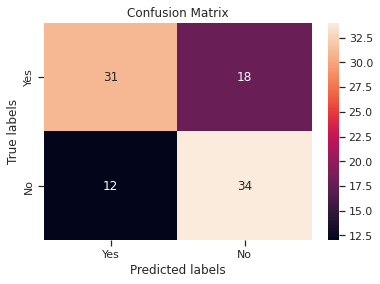

In [ ]:
cm=confusion_matrix(np.array(y_test_new),y_pred_bag_new,labels=[1,0]).ravel()
  
# fp: predict 1, fact 0 
ax= plt.subplot()
sns.heatmap(((tp,fn),(fp,tn)), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["Yes","No"]); ax.yaxis.set_ticklabels(["Yes","No"]);

<h2> Iteration 3: Synthetic Minority Over-sampling Technique (SMOTE)  </h2>

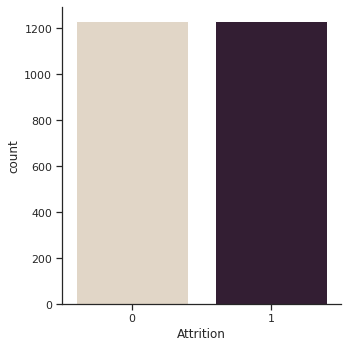

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X, y = oversample.fit_resample(df2.iloc[0:,1:], df2[['Attrition']])
df_new=pd.concat([y,X], axis=1)

sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x="Attrition", kind="count", palette="ch:.25", data=df_new)


In [ ]:
from sklearn.model_selection import train_test_split
train_new, test_new = train_test_split(df_new, test_size = 0.2, random_state = 1) 
# seperating data into 80% training and 20% testing sets

x_train_new = train_new.iloc[0:,1:] 
y_train_new = train_new[['Attrition']] 

x_test_new = test_new.iloc[0:,1:]
y_test_new = test_new[['Attrition']]

<h3> 3.1 Classfication Tree </h3>

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

model_classification_new = tree.DecisionTreeClassifier(max_depth = 3,criterion='entropy',random_state=1) # entropy: used for classify
model_classification_new.fit(x_train_new,y_train_new)

import numpy as np
from sklearn.metrics import confusion_matrix
classification_train_new = model_classification_new.predict(x_train_new)
classification_test_new = model_classification_new.predict(x_test_new)

tp, fn, fp, tn = confusion_matrix(np.array(y_test_new),classification_test_new,labels=[1,0]).ravel()
precision = round(tp/(tp+fp),2)
tpr = round(tp/(tp+fn),2)
f_score = round(2*precision*tpr/(precision+tpr),2)
auc_score= round(roc_auc_score(y_test_new,classification_test_new),2)

print("Recall/TPR:\t\t\t%1.2f proportion of employees actually leaving the company identified"%(tpr))
print("Precision:\t\t\t%1.2f identified as attrition are leaving the company"%(precision))
print("f-score:\t\t\t%1.2f capture both precision and recall"%(f_score))
print("roc_auc_score:\t\t\t%1.2f the capability of a model in distinguishing the classes"%(auc_score))

key = ("Iteration_3_SMOTE",'tree')
Performance[key] = [tpr,precision,f_score,auc_score]

Recall/TPR:			0.70 proportion of employees actually leaving the company identified
Precision:			0.81 identified as attrition are leaving the company
f-score:			0.75 capture both precision and recall
roc_auc_score:			0.76 the capability of a model in distinguishing the classes


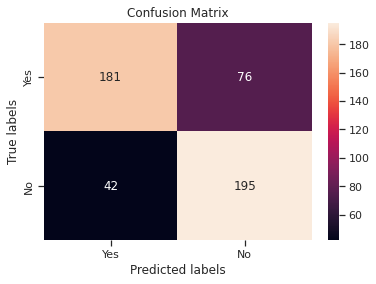

In [ ]:
cm=confusion_matrix(np.array(y_test_new),classification_test_new,labels=[1,0]).ravel()
import seaborn as sns
import matplotlib.pyplot as plt     
# fp: predict 1, fact 0 
ax= plt.subplot()
sns.heatmap(((tp,fn),(fp,tn)), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["Yes","No"]); ax.yaxis.set_ticklabels(["Yes","No"]);

<h3> 3.2 Random Forest </h3>

In [ ]:
model_Random_Forests_new = RandomForestClassifier(max_depth=4,min_samples_leaf=4,min_samples_split=2,n_estimators=10,random_state=1)
model_Random_Forests_new.fit(x_train_new,np.ravel(y_train_new))


parameters = {
     'n_estimators':(10, 30, 50),    
     'max_depth':(4,5,6,8,10,15),    
     'min_samples_split': (2, 4, 8), 
     'min_samples_leaf': (4,8,12,16) 
}
model_randome_best_new = GridSearchCV(RandomForestClassifier(),parameters,cv=3)
model_randome_best_new.fit(x_train_new, np.ravel(y_train_new))
model_randome_best_new.best_score_, model_randome_best_new.best_params_

depth = model_randome_best_new.best_params_['max_depth']
leaf = model_randome_best_new.best_params_['min_samples_leaf']
split = model_randome_best_new.best_params_['min_samples_split']
estimator = model_randome_best_new.best_params_['n_estimators']

model_Random_Forests_new = RandomForestClassifier(max_depth=depth,min_samples_leaf=leaf,min_samples_split=split,n_estimators=estimator,random_state=1)
model_Random_Forests_new.fit(x_train_new,np.ravel(y_train_new))

y_pred_rf_new = model_Random_Forests_new.predict(x_test_new)
tp, fn, fp, tn = confusion_matrix(np.array(y_test_new),y_pred_rf_new,labels=[1,0]).ravel()
precision = round(tp/(tp+fp),2)
tpr = round(tp/(tp+fn),2)
f_score = round(2*precision*tpr/(precision+tpr),2)
auc_score= round(roc_auc_score(y_test_new,y_pred_rf_new),2)

print("Recall/TPR:\t\t\t%1.2f proportion of employees actually leaving the company identified"%(tpr))
print("Precision:\t\t\t%1.2f identified as attrition are leaving the company"%(precision))
print("f-score:\t\t\t%1.2f capture both precision and recall"%(f_score))
print("roc_auc_score:\t\t\t%1.2f the capability of a model in distinguishing the classes"%(auc_score))

key = ("Iteration_3_SMOTE",'random_forest')
Performance[key] = [tpr,precision,f_score,auc_score]

Recall/TPR:			0.83 proportion of employees actually leaving the company identified
Precision:			0.90 identified as attrition are leaving the company
f-score:			0.86 capture both precision and recall
roc_auc_score:			0.87 the capability of a model in distinguishing the classes


Text(0.5, 0, 'Relative Importance')

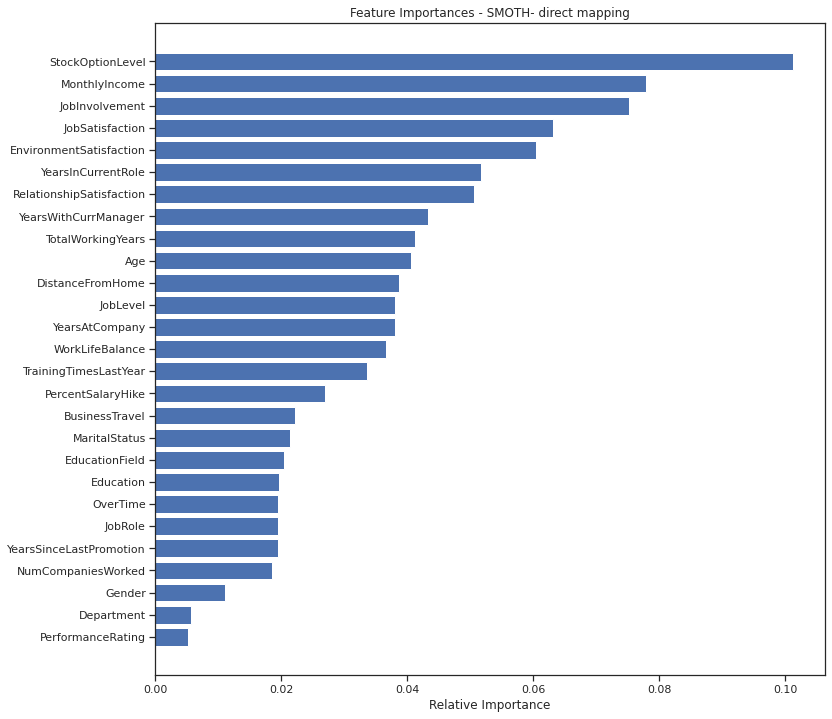

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
importances = model_Random_Forests_new.feature_importances_ 
indices = np.argsort(importances) 

feature_names = [key for key in df_new if not key == 'Attrition']
plt.figure(figsize=(12,12))
plt.title('Feature Importances - SMOTH- direct mapping')
plt.barh(range(len(indices)), importances[indices], color='b', align='center') 
plt.yticks(range(len(indices)),np.array(feature_names)[indices])
plt.xlabel('Relative Importance')

In [ ]:
indices_impor = indices[-7:]
impor_feature =np.array(feature_names)[indices_impor]
impor_feature

array(['RelationshipSatisfaction', 'YearsInCurrentRole',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'JobInvolvement',
       'MonthlyIncome', 'StockOptionLevel'], dtype='<U24')

<h3> 3.3 Bagging </h3>

In [ ]:
from sklearn.ensemble import BaggingClassifier 
model_Bagging_new=BaggingClassifier()
model_Bagging_new.fit(x_train_new,np.ravel(y_train_new))

from sklearn.model_selection import GridSearchCV
parameters = {
     'n_estimators':(30, 50), 
     'max_samples':(30,40,50),
     'max_features':(5,10,20), 
}

model_Bagging_best_new = GridSearchCV(BaggingClassifier(),parameters,cv=3)
model_Bagging_best_new.fit(x_train_new, np.ravel(y_train_new))
model_Bagging_best_new.best_score_, model_Bagging_best_new.best_params_


feature = model_Bagging_best_new.best_params_['max_features']
sample = model_Bagging_best_new.best_params_['max_samples']
estimator = model_Bagging_best_new.best_params_['n_estimators']

model_Bagging_new=BaggingClassifier(max_features=feature,max_samples=sample,n_estimators=estimator,random_state=1)
model_Bagging_new.fit(x_train_new,np.ravel(y_train_new))
model_Bagging_new.score(x_test_new,y_test_new)

from sklearn.metrics import confusion_matrix
y_pred_bag_new = model_Bagging_new.predict(x_test_new)

tp, fn, fp, tn = confusion_matrix(np.array(y_test_new),y_pred_bag_new,labels=[1,0]).ravel()
precision = round(tp/(tp+fp),2)
tpr = round(tp/(tp+fn),2)
f_score = round(2*precision*tpr/(precision+tpr),2)
auc_score= round(roc_auc_score(y_test_new,y_pred_bag_new),2)

print("Recall/TPR:\t\t\t%1.2f proportion of employees actually leaving the company identified"%(tpr))
print("Precision:\t\t\t%1.2f identified as attrition are leaving the company"%(precision))
print("f-score:\t\t\t%1.2f capture both precision and recall"%(f_score))
print("roc_auc_score:\t\t\t%1.2f the capability of a model in distinguishing the classes"%(auc_score))

key = ("Iteration_3_SMOTE",'bagging')
Performance[key] = [tpr,precision,f_score,auc_score]

Recall/TPR:			0.67 proportion of employees actually leaving the company identified
Precision:			0.79 identified as attrition are leaving the company
f-score:			0.73 capture both precision and recall
roc_auc_score:			0.74 the capability of a model in distinguishing the classes


<h2>Performance Comparison</h2>

In [ ]:
Performance_outcome = pd.DataFrame(Performance).T
Performance_outcome.columns=['Recall','Precision','f-score','AUC']


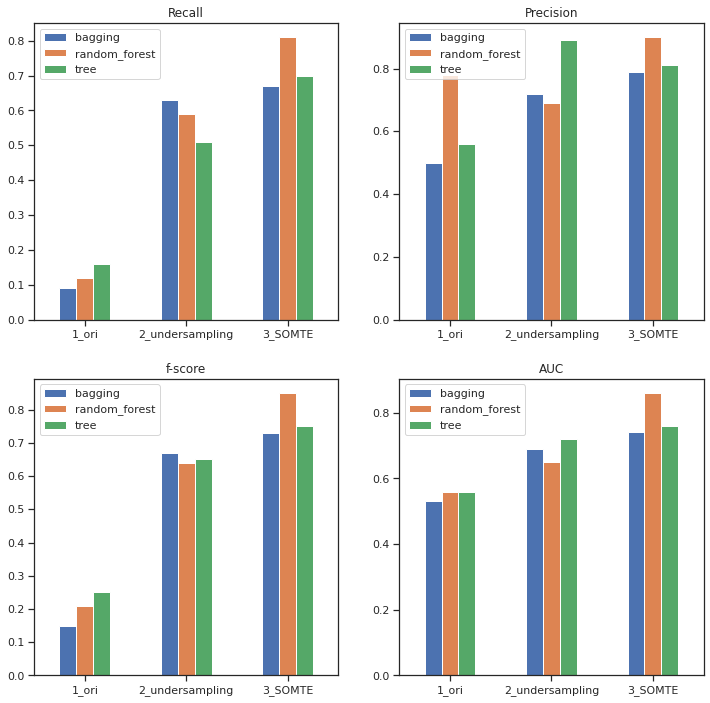

In [ ]:
COL_NUM = 2
ROW_NUM = 2
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

#for i in Performance_outcome.columns:
for i,measurement in enumerate(Performance_outcome.columns):
  data= Performance_outcome[measurement]
  ax=axes[int(i/COL_NUM), i%COL_NUM]
  data.unstack().plot(kind='bar',ax=ax)
  ax.set_title(measurement)
  ax.set_xticklabels(["1_ori", "2_undersampling", "3_SOMTE", ], rotation=0)

plt.savefig('performance.png')

<h1> Handling categorical data  </h1>
<h2> Iteration 4: One hot encoding    </h2>


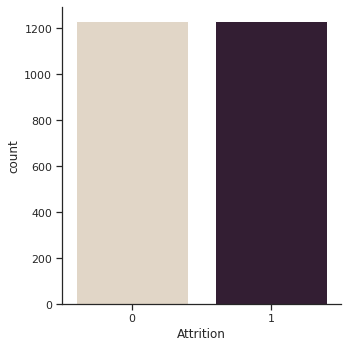

In [ ]:
#change categorical data to dummy variables:
df_dummy = pd.get_dummies(df1,columns = ['BusinessTravel','Department','EducationField',
                                        'Gender','JobRole','MaritalStatus','OverTime'])


# baseline: "BusinessTravel_Non-Travel"
df_dummy= df_dummy.drop(['BusinessTravel_Non-Travel'],axis=1)

# baseline: "Department_Human Resources"
df_dummy= df_dummy.drop(['Department_Human Resources'],axis=1)

# baseline: "EducationField_Human Resources"
df_dummy= df_dummy.drop(['EducationField_Human Resources'],axis=1)

# baseline: "JobRole_Sales Representative"
df_dummy= df_dummy.drop(['JobRole_Sales Representative'],axis=1)

# baseline: "MaritalStatus_Divorced"
df_dummy= df_dummy.drop(['MaritalStatus_Divorced'],axis=1)

# baseline: "Gender_Female"
df_dummy= df_dummy.drop(['Gender_Female'],axis=1)

# baseline: "OverTime_No"
df_dummy= df_dummy.drop(['OverTime_No'],axis=1)


from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X, y = oversample.fit_resample(df_dummy.iloc[0:,1:], df_dummy[['Attrition']])
df_new=pd.concat([y,X], axis=1)

sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x="Attrition", kind="count", palette="ch:.25", data=df_new)

from sklearn.model_selection import train_test_split
train_new, test_new = train_test_split(df_new, test_size = 0.2, random_state = 1) 
# seperating data into 80% training and 20% testing sets

x_train_new = train_new.iloc[0:,1:] 
y_train_new = train_new[['Attrition']] 

x_test_new = test_new.iloc[0:,1:]
y_test_new = test_new[['Attrition']]



In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

model_Random_Forests_new = RandomForestClassifier(max_depth=4,min_samples_leaf=4,min_samples_split=2,n_estimators=10,random_state=1)
model_Random_Forests_new.fit(x_train_new,np.ravel(y_train_new))


parameters = {
     'n_estimators':(10, 30, 50),    
     'max_depth':(4,5,6,8,10,15),    
     'min_samples_split': (2, 4, 8), 
     'min_samples_leaf': (4,8,12,16) 
}
model_randome_best_new = GridSearchCV(RandomForestClassifier(),parameters,cv=3)
model_randome_best_new.fit(x_train_new, np.ravel(y_train_new))
model_randome_best_new.best_score_, model_randome_best_new.best_params_

depth = model_randome_best_new.best_params_['max_depth']
leaf = model_randome_best_new.best_params_['min_samples_leaf']
split = model_randome_best_new.best_params_['min_samples_split']
estimator = model_randome_best_new.best_params_['n_estimators']

model_Random_Forests_new = RandomForestClassifier(max_depth=depth,min_samples_leaf=leaf,min_samples_split=split,n_estimators=estimator,random_state=1)
model_Random_Forests_new.fit(x_train_new,np.ravel(y_train_new))

y_pred_rf_new = model_Random_Forests_new.predict(x_test_new)
tp, fn, fp, tn = confusion_matrix(np.array(y_test_new),y_pred_rf_new,labels=[1,0]).ravel()
precision = round(tp/(tp+fp),2)
tpr = round(tp/(tp+fn),2)
f_score = round(2*precision*tpr/(precision+tpr),2)
auc_score= round(roc_auc_score(y_test_new,y_pred_rf_new),2)

print("Recall/TPR:\t\t\t%1.2f proportion of employees actually leaving the company identified"%(tpr))
print("Precision:\t\t\t%1.2f identified as attrition are leaving the company"%(precision))
print("f-score:\t\t\t%1.2f capture both precision and recall"%(f_score))
print("roc_auc_score:\t\t\t%1.2f the capability of a model in distinguishing the classes"%(auc_score))

key = ("Iteration_4_one_hot",'random_forest')
Performance[key] = [tpr,precision,f_score,auc_score]

Recall/TPR:			0.83 proportion of employees actually leaving the company identified
Precision:			0.95 identified as attrition are leaving the company
f-score:			0.89 capture both precision and recall
roc_auc_score:			0.89 the capability of a model in distinguishing the classes


In [ ]:
Performance

{('Iteration_1_original', 'bagging'): [0.09, 0.5, 0.15, 0.53],
 ('Iteration_1_original', 'random_forest'): [0.12, 0.78, 0.21, 0.56],
 ('Iteration_1_original', 'tree'): [0.16, 0.56, 0.25, 0.56],
 ('Iteration_2_undersampling', 'bagging'): [0.63, 0.72, 0.67, 0.69],
 ('Iteration_2_undersampling', 'random_forest'): [0.59, 0.69, 0.64, 0.65],
 ('Iteration_2_undersampling', 'tree'): [0.51, 0.89, 0.65, 0.72],
 ('Iteration_3_SMOTE', 'bagging'): [0.67, 0.79, 0.73, 0.74],
 ('Iteration_3_SMOTE', 'random_forest'): [0.81, 0.9, 0.85, 0.86],
 ('Iteration_3_SMOTE', 'tree'): [0.7, 0.81, 0.75, 0.76],
 ('Iteration_4_one_hot', 'random_forest'): [0.85, 0.94, 0.89, 0.89]}

In [ ]:
Performance_outcome = pd.DataFrame(Performance).T
Performance_outcome.columns=['Recall','Precision','f-score','AUC']
Performance_outcome

Recall  Precision  f-score   AUC
Iteration_1_original      tree             0.16       0.56     0.25  0.56
                          random_forest    0.12       0.78     0.21  0.56
                          bagging          0.09       0.50     0.15  0.53
Iteration_2_undersampling tree             0.51       0.89     0.65  0.72
                          random_forest    0.59       0.69     0.64  0.65
                          bagging          0.63       0.72     0.67  0.69
Iteration_3_SMOTE         tree             0.70       0.81     0.75  0.76
                          random_forest    0.81       0.90     0.85  0.86
                          bagging          0.67       0.79     0.73  0.74
Iteration_4_one_hot       random_forest    0.85       0.94     0.89  0.89

In [ ]:
Performance_outcome.iloc[[7,9]]

,,Recall,Precision,f-score,AUC
Iteration_3_SMOTE,random_forest,0.81,0.90,0.85,0.86
Iteration_4_one_hot,random_forest,0.85,0.94,0.89,0.89


**Conclusion**: Using one hot encoding improve the model performance

Text(0.5, 0, 'Relative Importance')

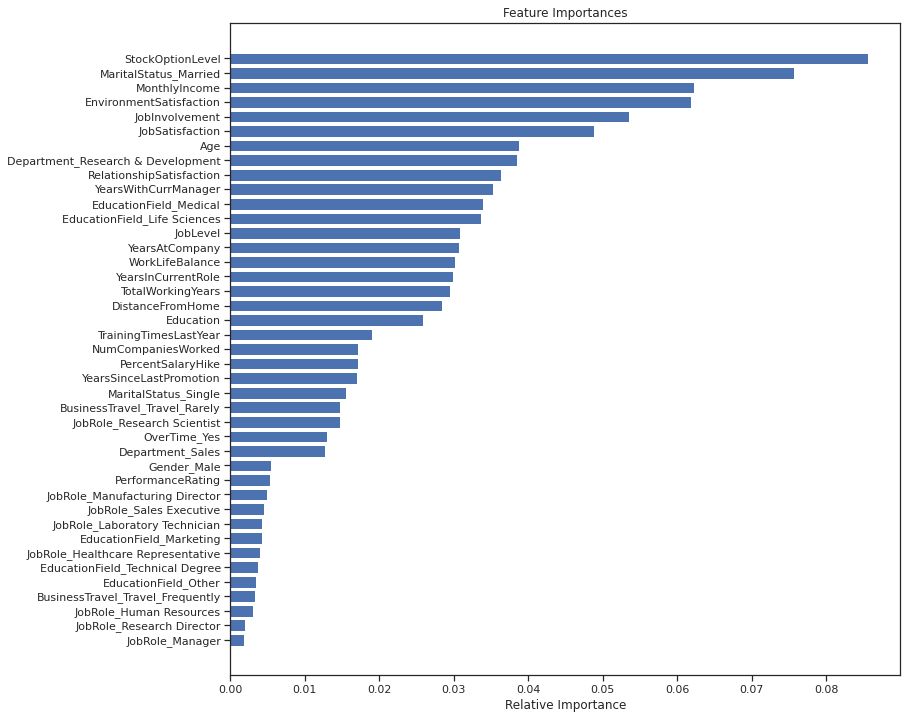

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
importances = model_Random_Forests_new.feature_importances_ 
indices = np.argsort(importances) 

feature_names = [key for key in df_dummy if not key == 'Attrition']
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center') 
plt.yticks(range(len(indices)),np.array(feature_names)[indices])
plt.xlabel('Relative Importance')

Find out the top 5 determined factors:

In [ ]:
indices_impor = indices[-5:]
impor_feature =np.array(feature_names)[indices_impor]
impor_feature = impor_feature[::-1] 
impor_feature

array(['StockOptionLevel', 'MaritalStatus_Married', 'MonthlyIncome',
       'EnvironmentSatisfaction', 'JobInvolvement'], dtype='<U33')

<h2>INSIGHTS: </h2>


<h3> StockOptionLevel and Attrition </h3>

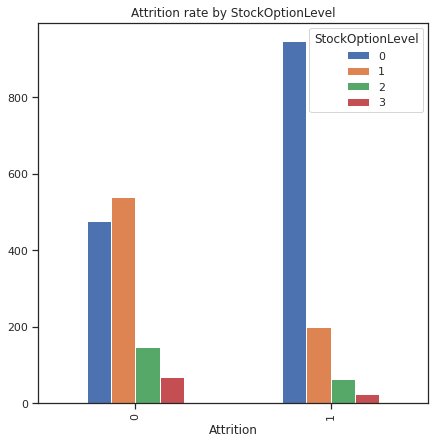

In [ ]:
att_stock = df_new.groupby(['Attrition','StockOptionLevel'])
att_stock .size().unstack().plot(kind='bar',title="Attrition rate by StockOptionLevel",figsize=(7,7))

([<matplotlib.axis.XTick at 0x7f5311e6cf50>,
 [Text(0, 0, 'stay'), Text(0, 0, 'leave')])

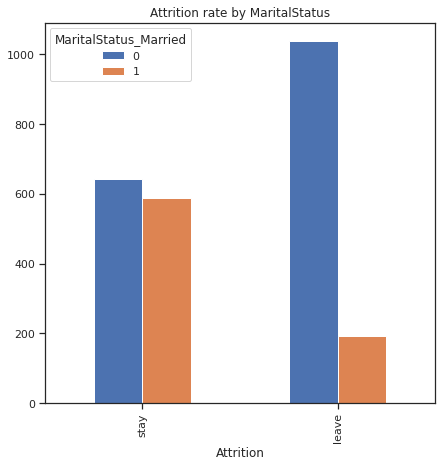

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

att_marry = df_new.groupby(['Attrition','MaritalStatus_Married'])
att_marry.size().unstack().plot(kind='bar',title="Attrition rate by MaritalStatus",figsize=(7,7))
plt.xticks([0,1],['stay','leave'])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

att_marry = df_new.groupby(['Attrition','MaritalStatus_Married'])
att_marry.size().unstack().plot(kind='bar',title="Attrition rate by MaritalStatus",figsize=(7,7))
plt.xticks([0,1],['stay','leave'])

<h3> Monthly Income and Attrition </h3>

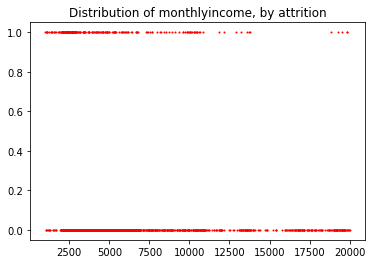

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df2['MonthlyIncome'],df1['Attrition'],s=1,color='r')
plt.title("Distribution of monthlyincome, by attrition")
plt.show()
plt.clf()

# seems like people who leave always get lower income 

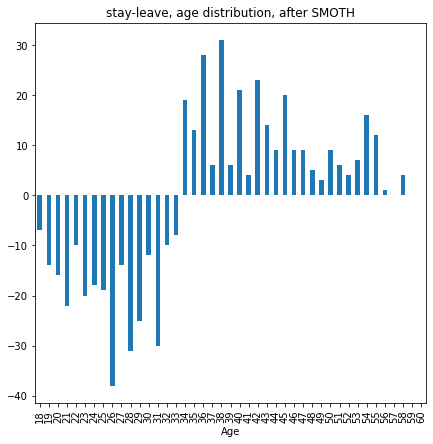

In [ ]:
job_age = df_new.groupby(['Attrition','Age'])
job_age_count= job_age.size()

job_age_stay=job_age_count.loc[[0]].reset_index('Attrition')[0]
job_age_leave=job_age_count.loc[[1]].reset_index('Attrition')[0]
job_age_diff= job_age_stay-job_age_leave

job_age_diff.plot(kind='bar',title="stay-leave, age distribution, after SMOTH",figsize=(7,7))

# younger employees are more unstale than older employees

<h3> Department and Attrition
 </h3>

In [ ]:
#['Healthcare Representative','Human Resources','Laboratory Technician','Manager','Manufacturing Director','Research Director','Research Scientist','Sales Executive','Sales Representative'])

job_role = df_new.groupby(['Attrition','JobRole'])
job_role_count= job_role.size()
job_role_stay=job_role_count.loc[[0]].reset_index('Attrition')[0]
job_role_leave=job_role_count.loc[[1]].reset_index('Attrition')[0]
job_role_diff= job_role_stay-job_role_leave

job_role_diff.plot(kind='bar',title="Attrition rate by Job Role",figsize=(7,7))

#department = df_new.groupby(['Attrition','Department'])
#department.size().unstack().plot(kind='bar',title="Attrition rate by department",figsize=(7,7))



KeyError: ignored

In [ ]:
job_time = df1.groupby(['Attrition','JobRole'])
job_role.size().unstack().plot(kind='bar',title="Attrition rate by Job Role",figsize=(12,12))

In [ ]:
import plotly.express as px
satisfaction_att=df_new.groupby(['JobSatisfaction','Attrition']).apply(lambda x:x['EmployeeNumber'].count()).reset_index(name='Counts')
px.area(satisfaction_att,x='JobSatisfaction',y='Counts',color='Attrition',title='Comparison Plot of the Job Satisfaction level Counts')

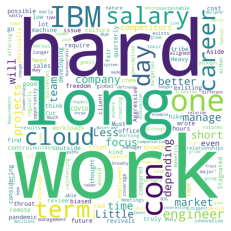

In [ ]:
#pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

text="I thought long and hard about this. I tried very hard to be fair when considering cons to avoid being biased about this. As of the time I wrote this review, there is only ONE con that I can think of... and that is remote work 100% of the time is NOT possible outside of the pandemic. They will require you to physically go to the office in the future once COVID is under control. Aside from that, IBM is truly a one-of-a-kind company to work for.No issue only salary hike is not good,low salary of existing employees,Less or Stagnated Career Growth, LOng hours depending on workloads,Little less salary compared to its revivals but with lot of freedom, Heavy red tape.  Cut throat.  Must manage your own career.  Need to find your tribe otherwise the machine will chew you up.  Very short term / quarterly focus.  Aggressive sales culture, at the cost of developing long term client relationships.  Senior management rotates regularly , reinforcing short term results versus building sustainable businesses. Depending on your team, you may have meetings either very early in the morning or very late in the day. This is due to the global nature of some teams. Dental Benefits could be better. Little coverage for 'major' surgeries.toxic manager, The innovative spirit no longer exists as it once did. The goals and projects are all aligned with perception in the cloud market, where there hasn't been much focus on IBM creating its own new frontier. To this, competitors are able to take advantage of this opportunity by offering better compensation packages and more interesting projects to work on. Although, you are at the mercy of the decisions made by leadership with respect to how the company grows in relation to the market and competitors. The biggest con is going from a cloud leader to not being in the BIG three anymore where pride has taken a hit, especially if you were in it from the start. But every day we work hard to push IBM to the front of the line again and one day we shall be again. slow, very bureaucratic, many tools that are hard to decipher and manage. Requirements for moving up the band system are defined too broadly. For example, there are docs and even badges for Software Engineer career paths, but there is no distinction between Cloud engineers and Z (Mainframe) engineers, even though the type and scope of work is vastly different between them."
#text=pd.read_csv('negative_comment.txt', header=None)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=3000,height=3000).generate(text)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()
